In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

# Chapter 4 - Understanding Basic Quantum Mechanical Priniciples

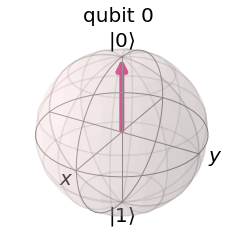

In [2]:
from qiskit.visualization import  plot_bloch_multivector
qc = QuantumCircuit(1)

# execute the quantum circuit 
backend = Aer.get_backend('statevector_simulator') 
result = execute(qc, backend).result()
stateVectorResult = result.get_statevector(qc)
#Display the Bloch sphere
plot_bloch_multivector(stateVectorResult)

In [3]:
#Place the qubit in a superposition state by adding a Hadamard (H)gate
qc.h(0)
#Draw the circuit
qc.draw()

┌───┐
q_0: ┤ H ├
     └───┘

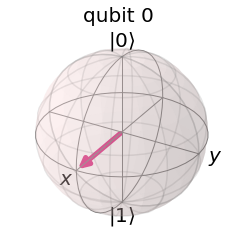

In [4]:
#Execute the circuit again and plot the result in the Bloch sphere
result = execute(qc, backend).result()
#Get the state vector results of the circuit
stateVectorResult = result.get_statevector(qc)

#Display the Bloch sphere
plot_bloch_multivector(stateVectorResult)

In [5]:
#Reset the quantum circuit
qc = QuantumCircuit(1)
#Rotate the qubit from 0 to 1 using the X (NOT) gate
qc.x(0)
#Add a Hadamard gate
qc.h(0)
#Draw the circuit
qc.draw()

┌───┐┌───┐
q_0: ┤ X ├┤ H ├
     └───┘└───┘

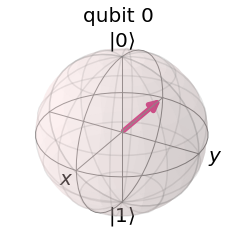

In [6]:
#Execute the circuit again and plot the result in the Bloch sphere
result = execute(qc, backend).result()
#Get the state vector results of the circuit
stateVectorResult = result.get_statevector(qc)

#Display the Bloch sphere
plot_bloch_multivector(stateVectorResult)

In [7]:
#Reset the quantum circuit
qc = QuantumCircuit(1,1)
#Add a Hadamard gate
qc.h(0)

In [8]:
#Create a measurement circuit with 1 qubit and 1 bit
measurement_circuit = QuantumCircuit(1,1)
#Measure function used to map the qubit and bit by their index value on the circuit, respectively
measurement_circuit.measure(0,0)
#Concatenate the circuits together
full_circuit = qc+measurement_circuit
#Draw the full circuit
full_circuit.draw()

┌───┐┌─┐
q_0: ┤ H ├┤M├
     └───┘└╥┘
c_0: ══════╩═

In [9]:
#Execute the circuit again and print the results
backend = Aer.get_backend('qasm_simulator')
result = execute(full_circuit, backend, shots=1000).result()
counts = result.get_counts(full_circuit)
print(counts)

{'1': 516, '0': 484}


In [10]:
#Create a circuit with 2 qubits and 2 classic bits
qc = QuantumCircuit(2,2)
#Add an H gate to each
qc.h(0)
qc.h(1)
#Measure the qubits to the classical bit
qc.measure([0,1],[0,1])
#Draw the circuit
qc.draw()

┌───┐┌─┐   
q_0: ┤ H ├┤M├───
     ├───┤└╥┘┌─┐
q_1: ┤ H ├─╫─┤M├
     └───┘ ║ └╥┘
c_0: ══════╩══╬═
              ║ 
c_1: ═════════╩═

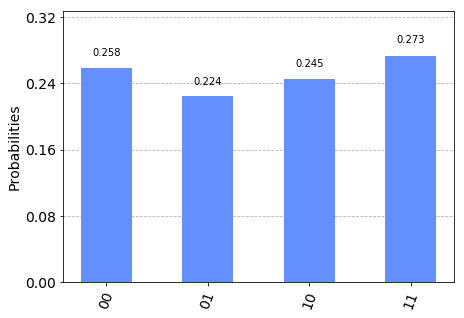

In [11]:
#Execute the circuit again and print the results
backend = Aer.get_backend('qasm_simulator')
result = execute(qc, backend, shots=1000).result()
counts = result.get_counts(qc)
plot_histogram(counts)

In [12]:
#Create a circuit with 2 qubits and 2 classic bits
qc = QuantumCircuit(2,2)
#Add an H gate to just the first qubit
qc.h(0)
#Add the CNOT gate to entangle the two qubits, where the first qubit is the Control, and the second qubit is the Target. 
qc.cx(0,1)
#Measure the qubits to the classical bit
qc.measure([0,1],[0,1])
#Draw the circuit
qc.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c_0: ═══════════╩══╬═
                   ║ 
c_1: ══════════════╩═

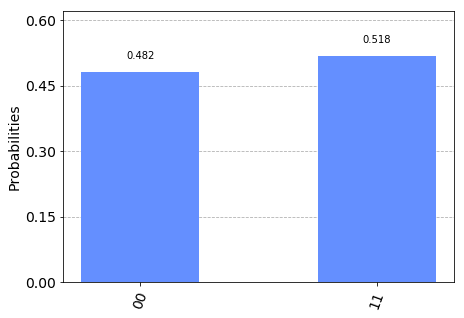

In [13]:
#Execute the circuit again and print the results
result = execute(qc, backend, shots=1000).result()
counts = result.get_counts(qc)
plot_histogram(counts)

In [14]:
# Import the QuantumRegister and ClassicalRegister functions
from qiskit import QuantumRegister, ClassicalRegister

q = QuantumRegister(3)
c = ClassicalRegister(3)
qc = QuantumCircuit(q, c)

In [15]:
qc.x(0)
qc.z(0)
qc.barrier()

In [16]:
qc.h(1)
qc.cx(1,2)
qc.barrier()

In [17]:
qc.cx(0,1)
qc.h(0)
qc.measure(0,0)
qc.measure(1,1)
qc.barrier()
qc.cx(1,2)
qc.barrier()

In [18]:
qc.z(2)
qc.x(2)
qc.measure(2,2)

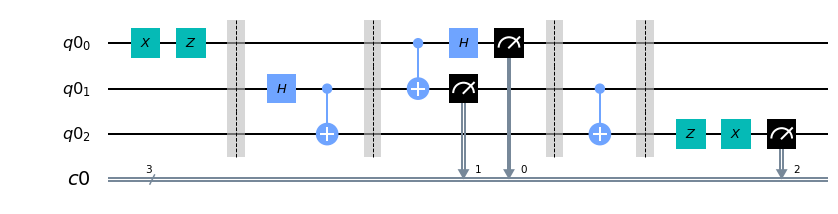

In [19]:
qc.draw(output='mpl')

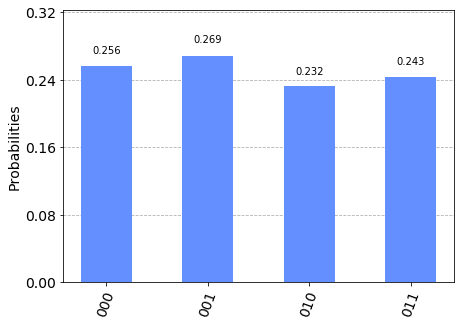

In [20]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1024)
job_result = job.result()
results = job_result.get_counts(qc)
plot_histogram(results) 

In [21]:
import qiskit.tools.jupyter
%qiskit_version_table